# SVMs and Kernals and You

 - Which hyperplane to use
 - Non-linearly seperatable data and slack varibales
 - Kernal trick to deal with non-linear data

## Maximizing Margins

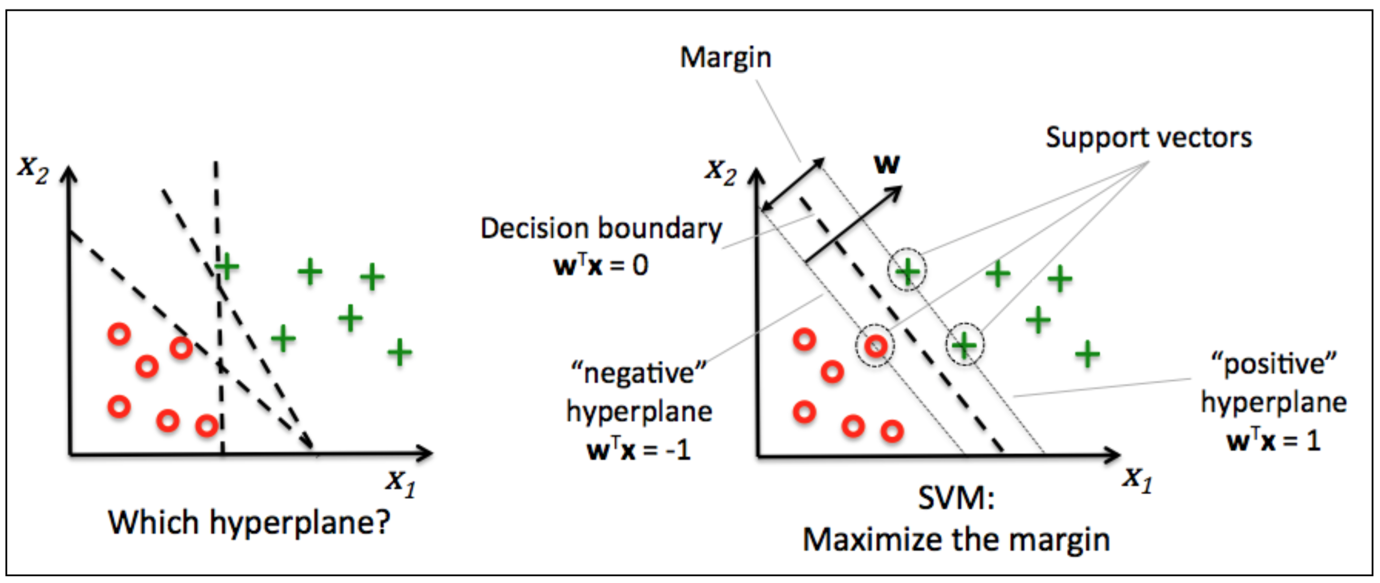

In [2]:
from PIL import Image
Image.open('/Users/oisin-brogan/Downloads/20170303070018_img20170303-11-vbeln3.png')

\begin{align}
\frac{w^T(x_{pos} - x_{neg})}{||w||} & = \frac{2}{||w||}
\end{align}

Where w is vector perpendicular to the decision boundary, $x_{pos}$ and $x_{neg}$ are the positive and negative support vectors on the hyperplanes parallel to the decision boundary.

Ojective becomes
 - Minimize $\frac{1}{2}||w||^2$

Subject to 
 - $w_0 + w^Tx^{(i)} >= 1 \text{ if } y^{(i)} = 1$
 - $w_0 + w^Tx^{(i)} < -1 \text{if } y^{(i)} = -1$
 
For overview of the maths, see http://web.mit.edu/6.034/wwwbob/svm-notes-long-08.pdf

Properties of SVM
 - Robust to outliers
 - Optimization problem, not gradient descent

Factoid
 - Originally developed by computer scientists, only later integrated into a statisical framework

## Slack Variables

What to do about non-linearly seperatably data

Adapt our constraints 
 - $w_0 + w^Tx^{(i)} >= 1 \text{ if } y^{(i)} = 1- \zeta^{(i)}$
 - $w_0 + w^Tx^{(i)} < -1 \text{if } y^{(i)} = -1 + \zeta^{(i)}$
 
 New objective function to minimize
 
 \begin{align}
 \frac{1}{2} ||w||^2 + C(\sum_i \zeta^{(i)})
 \end{align}
 
 Where C is a parameter we chose. We won't get into slack variables.

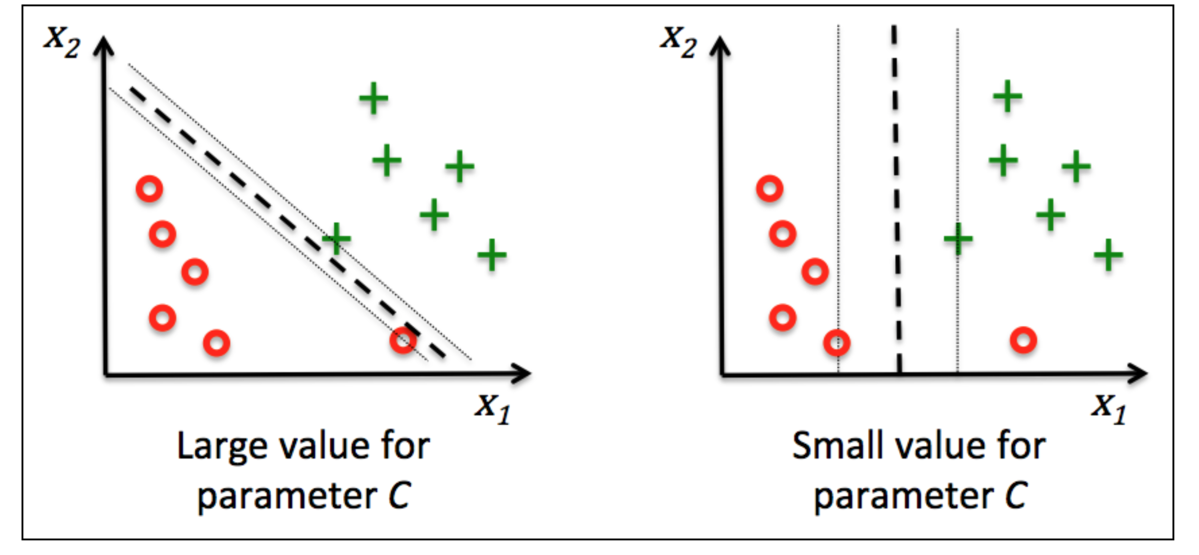

In [3]:
Image.open('/Users/oisin-brogan/Downloads/20170303081229_img20170303-16-7bnhcu.png')

In [4]:
from sklearn import datasets
import numpy as np

iris = datasets.load_iris()
X = iris.data[:, [2, 3]]
y = iris.target

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=0)

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

X_combined_std = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((y_train, y_test))

In [5]:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
import warnings


def versiontuple(v):
    return tuple(map(int, (v.split("."))))


def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):

    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
                    alpha=0.8, c=cmap(idx), edgecolors = 'k',
                    marker=markers[idx], label=cl)

    # highlight test samples
    if test_idx:
        # plot all samples
        if not versiontuple(np.__version__) >= versiontuple('1.9.0'):
            X_test, y_test = X[list(test_idx), :], y[list(test_idx)]
            warnings.warn('Please update to NumPy 1.9.0 or newer')
        else:
            X_test, y_test = X[test_idx, :], y[test_idx]

        plt.scatter(X_test[:, 0],
                    X_test[:, 1],
                    c='',
                    alpha=1.0,
                    linewidths = 1,
                    marker='o',
                    s=55,
                    edgecolors = 'k',label='test set')

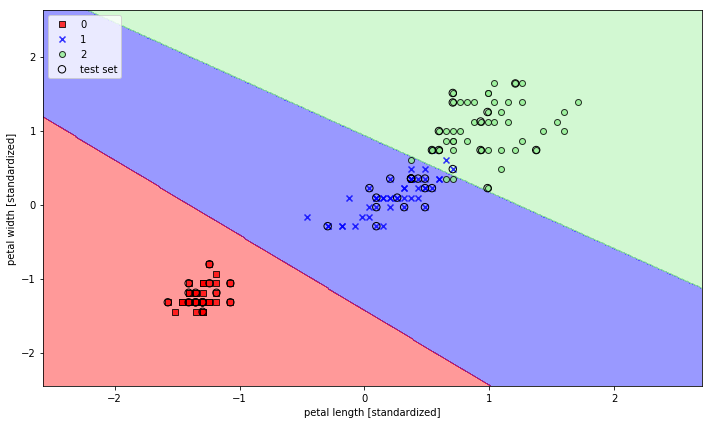

Accuracy on training data:  0.952
Accuracy on test data:  0.978


In [31]:
from sklearn.svm import SVC

svm = SVC(kernel='linear', C=1.0, random_state=0)
svm.fit(X_train_std, y_train)

plt.figure(figsize=(10,6))
plot_decision_regions(X_combined_std, y_combined,
                      classifier=svm, test_idx=range(105, 150), resolution = 0.01)
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

print ('Accuracy on training data: ', round(sum(svm.predict(X_train_std) == y_train)/float(len(y_train)), 3))
print ('Accuracy on test data: ', round(sum(svm.predict(X_test_std) == y_test)/float(len(y_test)), 3))

## Kernals for Nonlinear Problems

What to do about *really* non-linearly seperatable data

The basic idea behind kernel methods to deal with such linearly inseparable data is to create nonlinear combinations of the original features to project them onto a higher dimensional space via a mapping function φ (⋅) where it becomes linearly separable.

For this example, we can use the mapping

\begin{align}
\phi(x_1, x_2) = (z_1, z_2, z_3) = (x_1, x_2, x_1^2 + x_2^2)
\end{align}

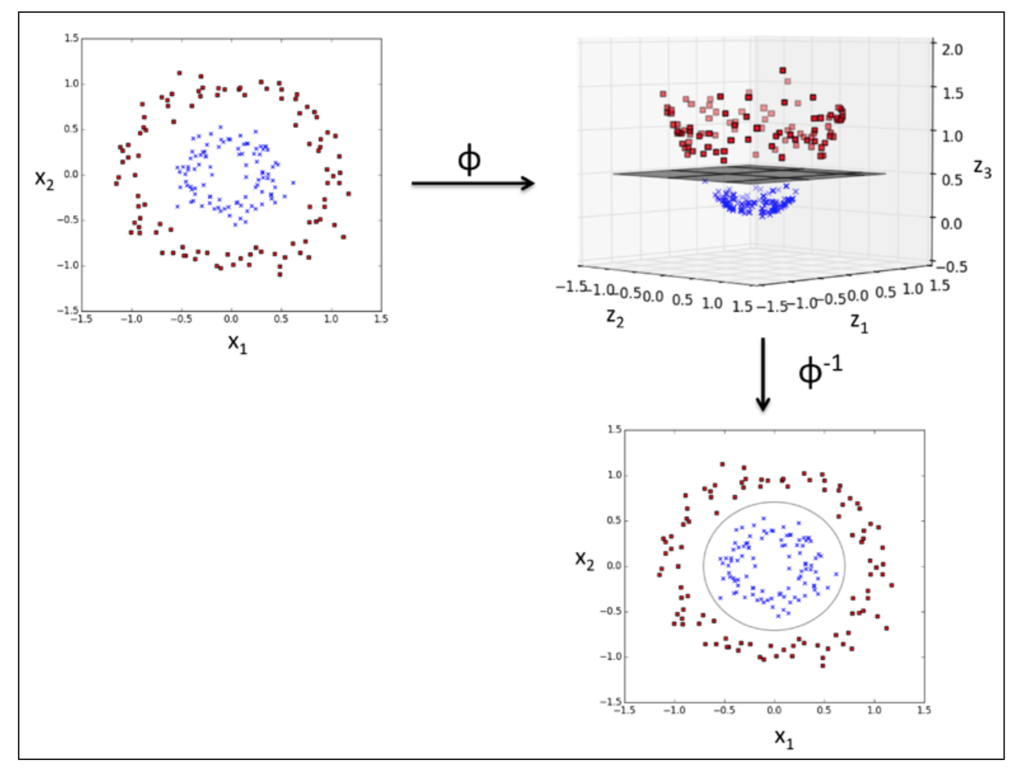

In [8]:
Image.open('/Users/oisin-brogan/Downloads/20170303102601_img20170303-13-uab6v4.png')

- Direct approach is computationally expensive
- SVM quadratic optimization problem is we replace dot product $x^{(i)T}x^{(j)}$ with the mapping $ \phi(x^{(i)})^T\phi(x^{(j)})$
- We can combine the expensive mapping and inner product with a kernal function, $k(x^{(i)},x^{(j)}) =  \phi(x^{(i)})^T\phi(x^{(j)})$


One of the most widely used kernels is the Radial Basis Function kernel (RBF kernel) or Gaussian kernel:
\begin{align}
k(x^{(i)},x^{(j)}) = \text{exp}\left (-\frac{||x^{(i)} - x^{(j)}||^2}{2\sigma^2}\right )
\end{align}
This is often simplfied to:
\begin{align}
k(x^{(i)},x^{(j)}) = \text{exp} \left(- \gamma ||x^{(i)} - x^{(j)}||^2 \right)
\end{align}
Where, γ = $\frac{1}{2\sigma^2}$ is a free parameter that is to be optimized.

- Intution of the kernal function is as a 'similarity' function, that varies from 0 to 1

- Common kernals in use
    - Fisher kernel
    - Graph kernels
    - Kernel smoother
    - Polynomial kernel
    - RBF kernel
    - String kernels


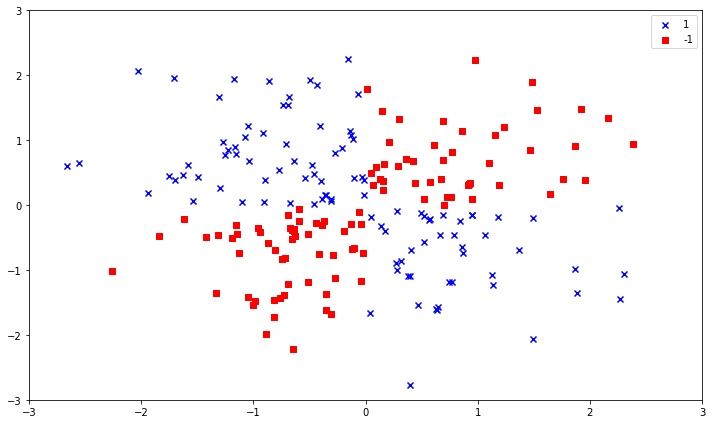

In [7]:
np.random.seed(0)
plt.figure(figsize=(10,6))
X_xor = np.random.randn(200, 2)
y_xor = np.logical_xor(X_xor[:, 0] > 0,
                       X_xor[:, 1] > 0)
y_xor = np.where(y_xor, 1, -1)

plt.scatter(X_xor[y_xor == 1, 0],
            X_xor[y_xor == 1, 1],
            c='b', marker='x',
            label='1')
plt.scatter(X_xor[y_xor == -1, 0],
            X_xor[y_xor == -1, 1],
            c='r',
            marker='s',
            label='-1')

plt.xlim([-3, 3])
plt.ylim([-3, 3])
plt.legend(loc='best')
plt.tight_layout()
plt.show()

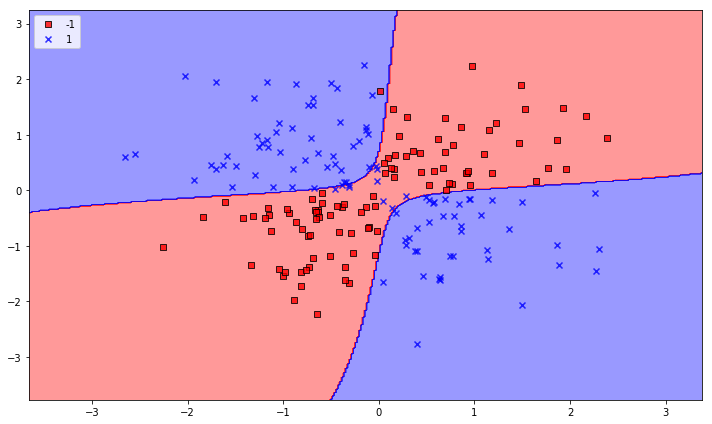

In [30]:
svm = SVC(kernel='rbf', random_state=0, gamma=0.10, C=10.0)
svm.fit(X_xor, y_xor)

plt.figure(figsize=(10,6))
plot_decision_regions(X_xor, y_xor,
                      classifier=svm)

plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

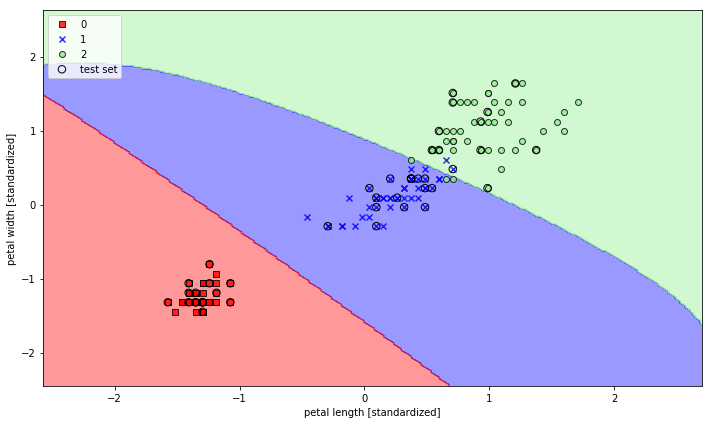

Accuracy on training data:  0.952
Accuracy on test data:  0.978


In [28]:
from sklearn.svm import SVC

svm = SVC(kernel='rbf', random_state=0, gamma=0.2, C=1.0)
svm.fit(X_train_std, y_train)

plt.figure(figsize=(10,6))
plot_decision_regions(X_combined_std, y_combined,
                      classifier=svm, test_idx=range(105, 150))
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

print ('Accuracy on training data: ', round(sum(svm.predict(X_train_std) == y_train)/float(len(y_train)), 3))
print ('Accuracy on test data: ', round(sum(svm.predict(X_test_std) == y_test)/float(len(y_test)), 3))

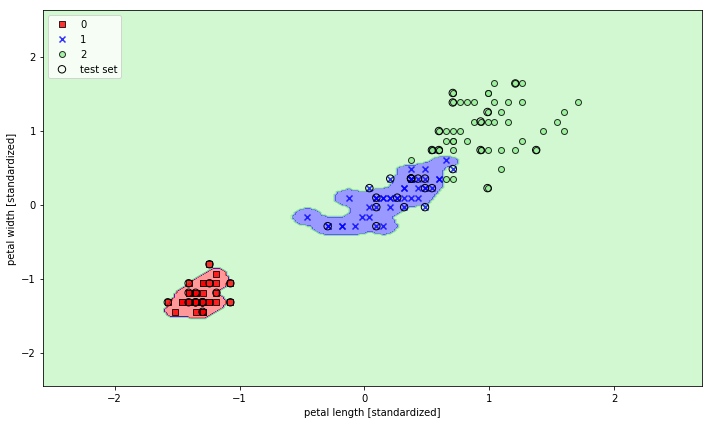

Accuracy on training data:  0.99
Accuracy on test data:  0.8


In [27]:
svm = SVC(kernel='rbf', random_state=0, gamma=100.0, C=1.0)
svm.fit(X_train_std, y_train)

plt.figure(figsize=(10,6))
plot_decision_regions(X_combined_std, y_combined, 
                      classifier=svm, test_idx=range(105, 150))
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

print ('Accuracy on training data: ', round(sum(svm.predict(X_train_std) == y_train)/float(len(y_train)), 3))
print ('Accuracy on test data: ', round(sum(svm.predict(X_test_std) == y_test)/float(len(y_test)), 3))